# --**Importações bibliotecas**-- 

In [1]:
#Importação

import numpy as np
import pandas as pd
from numpy import log10
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist, pdist
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")
%matplotlib inline
import sys
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from datetime import datetime
import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing



In [2]:
#Instalando o MLFLOW
!pip install mlflow --quiet
!pip install pyngrok --quiet # Servidor para simular o painel criado para mostar os logs 

In [3]:
import mlflow
import mlflow.sklearn

mlflow.set_experiment('brazilian_cities-ML')


<Experiment: artifact_location='file:///content/mlruns/1', creation_time=1664835286969, experiment_id='1', last_update_time=1664835286969, lifecycle_stage='active', name='brazilian_cities-ML', tags={}>

In [4]:
#Versão Instalada
mlflow.__version__

'1.29.0'

In [5]:
#Inicio o MlFlow
mlflow.start_run()

<ActiveRun: >

# **Base de dados**



In [6]:
df_brazil=pd.read_csv("https://raw.githubusercontent.com/leoRecTI/teste2/main/cidadesBrasil/BRAZIL_CITIES_REV2022.CSV", on_bad_lines='skip')


#1° Agrupamento
Vamos construir uma Máquina Preditiva que, a partir de dados das cidades, agrupe por similaridade, afim de compreender o comportamento das cidades e e explicação do seu desenvolvimento.
Também vamos analisar vamos passar por uma lista de algoritmos diferentes de predição, usando Regressão Linear, floresta aleatórias e 
K-vizinhos

# **2 Análise exploratória dos dados**



In [7]:
#Visualização dos dados 
df_brazil.head()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,0,6876,6876,0,2137,1546,591,5300,...,0,0,0,2158,1246,0,0,0,0,1
1,Abadia Dos Dourados,MG,0,6704,6704,0,2328,1481,847,4154,...,0,0,0,2227,1142,0,0,0,0,1
2,Abadiânia,GO,0,15757,15609,148,4655,3233,1422,10656,...,1,33724584,67091904,2838,1426,0,0,0,0,3
3,Abaetetuba,PA,0,141100,141040,60,31061,19057,12004,82956,...,4,76181384,800078483,5277,25661,0,0,0,0,2
4,Abaeté,MG,0,22690,22690,0,7694,6667,1027,18464,...,2,44974716,371922572,6928,2953,0,0,0,0,4


In [8]:
 #Verificando se existe dados nulos
print(df_brazil.isnull().sum())

CITY                 0
STATE                0
CAPITAL              0
IBGE_RES_POP         0
IBGE_RES_POP_BRAS    0
                    ..
Wheeled_tractor      0
UBER                 0
MAC                  0
WAL-MART             0
POST_OFFICES         0
Length: 81, dtype: int64


In [9]:
#Verificando se existe dados nulos
#df_brazil.info()

In [10]:
# Criando os dataframes por região
nordeste = df_brazil.loc[(df_brazil['STATE'] == 'PE') | (df_brazil['STATE'] == 'MA') | (df_brazil['STATE'] == 'RN') | (df_brazil['STATE'] == 'BA') | (df_brazil['STATE'] == 'CE') | (df_brazil['STATE'] == 'AL') | (df_brazil['STATE'] == 'PI') | (df_brazil['STATE'] == 'PB') | (df_brazil['STATE'] == 'SE')]
norte =  df_brazil.loc[(df_brazil['STATE'] == 'AC') | (df_brazil['STATE'] == 'AP') | (df_brazil['STATE'] == 'AM') | (df_brazil['STATE'] == 'PA') | (df_brazil['STATE'] == 'RO') | (df_brazil['STATE'] == 'RR') | (df_brazil['STATE'] == 'TO')]
sul = df_brazil.loc[(df_brazil['STATE'] == 'PR') | (df_brazil['STATE'] == 'RS') | (df_brazil['STATE'] == 'SC')]
centroOeste =  df_brazil.loc[(df_brazil['STATE'] == 'DF') | (df_brazil['STATE'] == 'GO') | (df_brazil['STATE'] == 'MT') | (df_brazil['STATE'] == 'MS')]
suldeste = df_brazil.loc[(df_brazil['STATE'] == 'ES') | (df_brazil['STATE'] == 'MG') | (df_brazil['STATE'] == 'SP') | (df_brazil['STATE'] == 'RJ')]
# Verificação dos estados 
checknordeste = ['PE','BA', 'MA','PI','CE','RN','PB','AL','SE']
checknorte = ['AC','AP', 'AM','PA','RO','RR','TO']
checksul = ['PR','RS', 'SC']
checkcentroOeste = ['DF','GO', 'MT','MS']
checksudeste = ['ES','MG', 'SP','RJ']
# Verificação das cidades por estado
cidadesNordeste = df_brazil["STATE"].isin(checknordeste)
cidadesNorte = df_brazil["STATE"].isin(checknorte)
cidadesSul = df_brazil["STATE"].isin(checksul)
cidadesCentroOeste = df_brazil["STATE"].isin(checkcentroOeste)
cidadesSudeste = df_brazil["STATE"].isin(checksudeste)

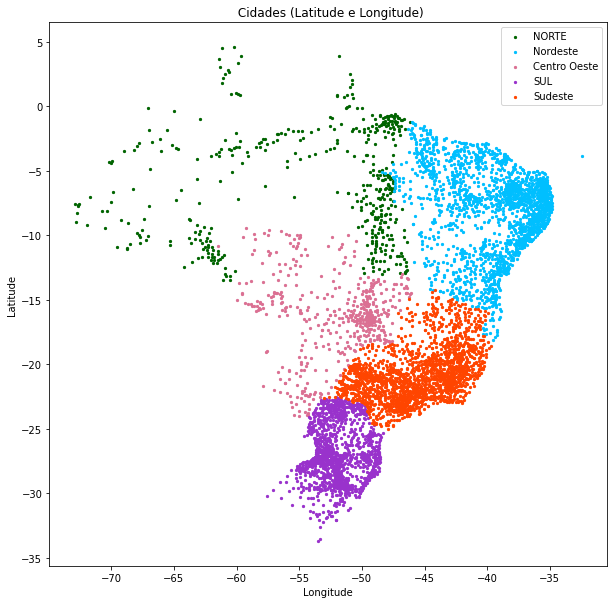

In [11]:
# Mapa do Brasil 

long= df_brazil["LONG"] !=0
lat = df_brazil["LAT"] !=0 
## Montando o Mapa
plt.figure(figsize=(10,10))
plt.title(" Cidades (Latitude e Longitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(df_brazil[long&lat&cidadesNorte]["LONG"], df_brazil[long&lat&cidadesNorte]["LAT"], s=5, alpha=1, label='NORTE', c ='#006400')
plt.scatter(df_brazil[long&lat&cidadesNordeste]["LONG"], df_brazil[long&lat&cidadesNordeste]["LAT"], s=5, alpha=1, label='Nordeste', c ='#00BFFF')
plt.scatter(df_brazil[long&lat&cidadesCentroOeste]["LONG"], df_brazil[long&lat&cidadesCentroOeste]["LAT"], s=5, alpha=1, label='Centro Oeste', c ='#DB7093')
plt.scatter(df_brazil[long&lat&cidadesSul]["LONG"], df_brazil[long&lat&cidadesSul]["LAT"], s=5, alpha=1, label='SUL', c ='#9932CC')
plt.scatter(df_brazil[long&lat&cidadesSudeste]["LONG"], df_brazil[long&lat&cidadesSudeste]["LAT"], s=5, alpha=1, label='Sudeste', c ='#FF4500')

plt.legend()
plt.show()

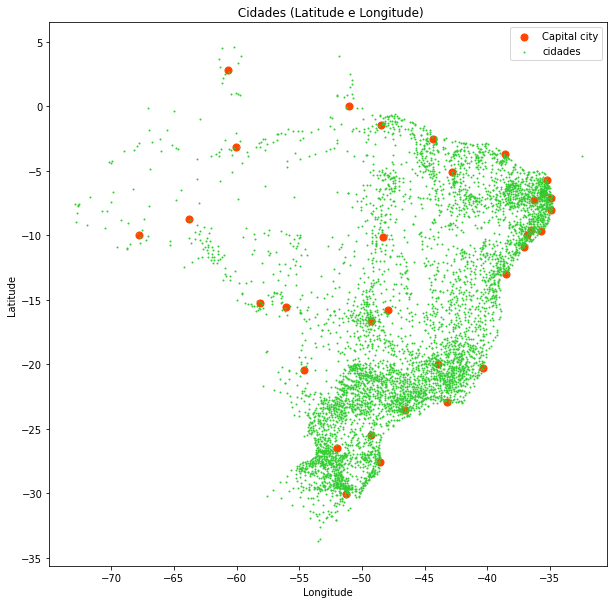

In [12]:
# Mapa do Brasil Capitais

long= df_brazil["LONG"] != 0
lat = df_brazil["LAT"] !=0 
cap = df_brazil['CAPITAL'] ==1
 
#Montando o Mapa
plt.figure(figsize=(10,10))
plt.title(" Cidades (Latitude e Longitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(df_brazil[long&lat&cap]["LONG"], df_brazil[long&lat&cap]["LAT"], s=50, alpha=1, label='Capital city', c ='#ff4500')
plt.scatter(df_brazil[long&lat&~cap]["LONG"], df_brazil[long&lat&~cap]["LAT"], s=1, alpha=1, label='cidades', c = '#32cd32')
plt.legend()
plt.show()

# **3 Pré-processamento dos dados**



In [13]:
#  Eliminando linhas duplicadas (Cidades: Assis, Paraty e Nova Fátima)
df_brazil = df_brazil.drop_duplicates()

In [14]:
# Cidade de Paraty possui dois dados sobre a agência de correios, eliminei o diferente de 1 (pesquisado no google que só existe uma agência)
df_brazil.drop(df_brazil.loc[(df_brazil['CITY']=='Paraty') & (df_brazil['POST_OFFICES'] != 1)].index, inplace=True)

In [15]:
#Limpando as cidades que tem área menor que 3.565 km², pois foi pesquisado que nao existe cidade menor que essetamanho de área
df_brazil.drop(df_brazil.loc[(df_brazil['AREA'] < 3.565)].index, inplace=True)

In [16]:
#Eliminando as cidades que tem menos de 776 habitantes
df_brazil.drop(df_brazil.loc[(df_brazil['IBGE_RES_POP'] < 776)].index, inplace=True)

In [17]:
#Eliminando as cidades que tem IDHM menor que 0.0
df_brazil.drop(df_brazil.loc[(df_brazil['IDHM'] == 0.0)].index, inplace=True)

## **Parametros que serão usados para o agrupamento** 

* IBGE_RES_POP - Resident Population 
* IBGE_DU - Domestic Units Total 
* IBGE_1 - Resident Population Regular Urban Planning 
* IBGE_1-4 - Resident Population Regular Urban Planning
* IBGE_5-9 - Resident Population Regular Urban Planning 
* IBGE_10-14 - Resident Population Regular Urban Planning
* IBGE_15-59 - Resident Population Regular Urban Planning 
* IBGE_60+ - Resident Population Regular Urban Planning - above 60 
* IBGE_CROP_PRODUCTION_$ - Crop Production
* IDHM - HDI Human Development Index
* TAXES - Taxes
* GDP - Gross Domestic Product 
* COMP_TOT - Total number of companies






In [18]:
#Criando as variáveis de entrada do modelo 
variáveisModelo = df_brazil[['IBGE_RES_POP','TAXES','GDP','IDHM Ranking 2010','COMP_TOT','AREA','COMP_A','COMP_B','COMP_C','COMP_D','COMP_E','COMP_F','COMP_G','COMP_H','COMP_I','COMP_J','COMP_K','COMP_L','COMP_M','COMP_N','COMP_O','COMP_P','COMP_Q','COMP_R','COMP_S','COMP_T','COMP_U']].values
variáveisModelo

array([[6.87600e+03, 2.05540e+04, 1.66412e+05, ..., 5.00000e+00,
        0.00000e+00, 0.00000e+00],
       [6.70400e+03, 1.28730e+04, 1.80089e+05, ..., 1.90000e+01,
        0.00000e+00, 0.00000e+00],
       [1.57570e+04, 2.68230e+04, 2.87984e+05, ..., 8.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [1.08590e+04, 1.62600e+03, 5.68540e+04, ..., 3.00000e+00,
        0.00000e+00, 0.00000e+00],
       [4.93330e+04, 2.43770e+04, 6.12233e+05, ..., 2.00000e+01,
        0.00000e+00, 0.00000e+00],
       [2.67300e+03, 6.91000e+02, 8.89080e+04, ..., 8.00000e+00,
        0.00000e+00, 0.00000e+00]])

# **4 Máquina preditiva**



### Usaremos o **PCA** para reduzir a quantidade de variáveis

#### PCA é uma Técnica de Aprendizagem não supervisionada utilizada para reduzir a dimensionalidade dos dados.

Transformamos as 13 variáveis em 2 variáveis (2 componentes principais). O Importante é entender que a transformação
foi realizada por meio da Algebra. 
O que fizermos foi juntar as variáveis de acordo com sua semelhança entre 
si, onde essa semelhança foi medida pela variância.

In [19]:
# Aplica redução de dimensionalidade no array das variáveis
pca = PCA(n_components = 2).fit_transform(variáveisModelo)

# Agora vamos usar o K-means

### Usaremos o Algoritmo **Kmeans** para Criar os grupos (segmentos).

* O agrupamento é guiado pelo princípio de que os itens dentro de um cluster devem ser muito semelhantes entre si, mas muito diferentes entre clusters.
* Simplificação de grandes conjuntos de dados agrupando características com valores semelhantes em um número menor de categorias homogêneas
* Se você começar com dados sem rótulo ou seja sem variável target, você pode usar o clustering para criar rótulos de classe. 

* A qualidade do agrupamento depende do algoritmo escolhido, da função de distância e da aplicação. Diz-se que a qualidade de um modelo de cluster é superior, quando a distância inter-cluster é maximizada e a distância intra-cluster é minimizada

* Às vezes, o número de clusters é definido por requisitos de negócios ou a motivação para a análise. 

* Muito provavelmente, você terá um conhecimento a priori sobre os verdadeiros agrupamentos e você pode aplicar essa informação para escolher o número de clusters.

In [20]:
# Determinando um range do Hyperparâmetro  "K"  do Kmeans
k_ranger =range(1,12)
k_ranger

range(1, 12)

In [21]:
# Aplicando o modelo K-Means para cada valor de K 
k_mean_var = [KMeans(n_clusters= k).fit(pca) for k in k_ranger]


## Curva de Elban

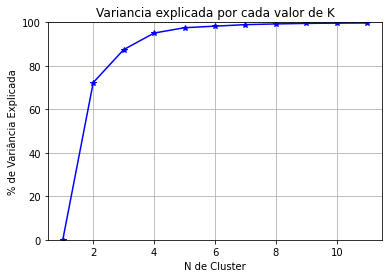

In [22]:
#Ajustando o centroide do cluster para cada modelo
centroids = [X.cluster_centers_ for X in k_mean_var]

#Calculando a distancia euclidiana de cada ponto de dado para o centroide
k_euclid = [cdist(pca, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

#Soma dos quadrados das distancia dentro do cluster
soma_distancia_intra_cluster = [sum(d**2) for d in dist]

#Soma total dos quadrados 
sum_total = sum(pdist(pca)**2)/pca.shape[0]

#soma dos quadrados entre cluster
soma_distancia_intra_cluster = sum_total - soma_distancia_intra_cluster

#Curva de Elban
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_ranger, soma_distancia_intra_cluster/sum_total*100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('N de Cluster')
plt.ylabel('% de Variância Explicada')
plt.title('Variancia explicada por cada valor de K');


# **5 Avaliação de máquina preditiva**



### Avaliando a Máquina Preditiva V1 com k = 6

In [23]:
#criando um modelo com k = 6
modelo_v1 = KMeans(n_clusters = 6)
modelo_v1.fit(pca)

KMeans(n_clusters=6)

In [24]:
#Silhoette Score
labels = modelo_v1.labels_

KMeans6 = silhouette_score(pca, labels, metric = 'euclidean')
KMeans6


0.909651238727546

### Avaliando a Máquina Preditiva V2 com k = 7

In [25]:
#criando um modelo com k = 7
modelo_v2 = KMeans(n_clusters = 7)
modelo_v2.fit(pca)

KMeans(n_clusters=7)

In [26]:
#Silhoette Score
labels = modelo_v2.labels_

KMeans7 = silhouette_score(pca, labels, metric = 'euclidean')
KMeans7

0.90946501847374

### Avaliando a Máquina Preditiva V3 com k = 8

In [27]:
#criando um modelo com k = 8
modelo_v3 = KMeans(n_clusters = 8)
modelo_v3.fit(pca)

KMeans()

In [28]:
#Silhoette Score
labels = modelo_v3.labels_

KMeans8 = silhouette_score(pca, labels, metric = 'euclidean')
KMeans8

0.890071991377382

### Avaliando a Máquina Preditiva V3 com k = 9

In [29]:
#criando um modelo com k = 9
modelo_v4 = KMeans(n_clusters = 9)
modelo_v4.fit(pca)

KMeans(n_clusters=9)

In [30]:
#Silhoette Score
labels = modelo_v4.labels_

KMeans9 = silhouette_score(pca, labels, metric = 'euclidean')
KMeans9

0.8519503364946118

### Avaliando a Máquina Preditiva V4 com k = 10

In [31]:
#criando um modelo com k = 10
modelo_v5 = KMeans(n_clusters = 10)
modelo_v5.fit(pca)

KMeans(n_clusters=10)

In [32]:
#Silhoette Score
labels = modelo_v5.labels_

KMeans10 = silhouette_score(pca, labels, metric = 'euclidean')
KMeans10

0.8473157611566093

# Usando as marcações dos clurstes da máuina preditiva final

In [33]:
df_brazil['cluster'] = modelo_v1.labels_

In [34]:
df_brazil.groupby('cluster')['GDP'].mean()

cluster
0    3.798786e+05
1    6.870359e+08
2    2.824642e+08
3    6.393537e+07
4    2.384964e+07
5    7.700314e+06
Name: GDP, dtype: float64

In [35]:
df_brazil.groupby('cluster')['IDHM'].mean()

cluster
0    0.655053
1    0.805000
2    0.811500
3    0.782417
4    0.774350
5    0.754116
Name: IDHM, dtype: float64

In [36]:
cluster0 = df_brazil[df_brazil['cluster']== 0]['cluster'].count()
cluster0

5344

In [37]:
cluster1 = df_brazil[df_brazil['cluster']== 1]['cluster'].count()
cluster1

1

In [38]:
cluster2 = df_brazil[df_brazil['cluster']== 2]['cluster'].count()
cluster2

2

In [39]:
cluster3 = df_brazil[df_brazil['cluster']== 3]['cluster'].count()
cluster3

12

In [40]:
cluster4 = df_brazil[df_brazil['cluster']== 4]['cluster'].count()
cluster4


40

In [41]:
cluster5 = df_brazil[df_brazil['cluster']== 5]['cluster'].count()
cluster5

164

In [42]:
df_brazil[df_brazil['cluster']== 0][['IBGE_RES_POP','TAXES','GDP','IDHM Ranking 2010','COMP_TOT','AREA','IDHM']].sort_values('GDP', ascending=False).head()

,IBGE_RES_POP,TAXES,GDP,IDHM Ranking 2010,COMP_TOT,AREA,IDHM
2515,88006,344685,4040385,431,2475,7174.225,0.757
288,104150,450807,4030758,596,4432,382.215,0.748
285,214006,401063,4012632,3143,3992,345.655,0.649
2791,60105,635335,3999684,1431,3034,3940.537,0.716
272,109801,301892,3923828,200,3108,2729.508,0.773


In [43]:
df_brazil[df_brazil['cluster']== 1][['IBGE_RES_POP','TAXES','GDP','IDHM Ranking 2010','COMP_TOT','AREA']].sort_values('GDP', ascending=False).head()

,IBGE_RES_POP,TAXES,GDP,IDHM Ranking 2010,COMP_TOT,AREA
4997,11253503,117125387,687035890,28,530446,1521.11


In [44]:
df_brazil[df_brazil['cluster']== 2][['IBGE_RES_POP','TAXES','GDP','IDHM Ranking 2010','COMP_TOT','AREA','IDHM']].sort_values('GDP', ascending=False).head()

,IBGE_RES_POP,TAXES,GDP,IDHM Ranking 2010,COMP_TOT,AREA,IDHM
4175,6320446,68106116,329431360,46,190038,1200.255,0.799
719,2570160,29145585,235497107,9,86200,5760.783,0.824


In [45]:
df_brazil[df_brazil['cluster']== 3][['IBGE_RES_POP','TAXES','GDP','IDHM Ranking 2010','COMP_TOT','AREA','IDHM']].sort_values('GDP', ascending=False).head()

,IBGE_RES_POP,TAXES,GDP,IDHM Ranking 2010,COMP_TOT,AREA,IDHM
550,2375151,12495658,88277463,20,103867,331.401,0.810
1458,1751907,15912488,83788904,10,101929,435.036,0.823
3435,666740,15626341,74402691,174,15315,64.954,0.776
3897,1409351,10986035,73425264,32,80082,495.390,0.805
2849,1802014,12433232,70296364,852,21586,11401.092,0.737


In [46]:
df_brazil[df_brazil['cluster']== 4][['IBGE_RES_POP','TAXES','GDP','IDHM Ranking 2010','COMP_TOT','AREA','IDHM']].sort_values('GDP', ascending=False).head()

,IBGE_RES_POP,TAXES,GDP,IDHM Ranking 2010,COMP_TOT,AREA,IDHM
4740,765463,7102546,42131380,31,25504,409.532,0.805
1603,855048,4898139,39857742,1579,12129,467.072,0.711
2599,370126,7289366,39782736,11,16395,431.207,0.822
4888,629921,4998656,37315783,24,20912,1099.409,0.807
5327,604013,8024748,32536256,72,25562,4115.206,0.789


In [47]:
df_brazil[df_brazil['cluster']== 5][['IBGE_RES_POP','TAXES','GDP','IDHM Ranking 2010','COMP_TOT','AREA','IDHM']].sort_values('GDP', ascending=False).head()

,IBGE_RES_POP,TAXES,GDP,IDHM Ranking 2010,COMP_TOT,AREA,IDHM
4880,408258,1493522,15735652,51,21637,431.944,0.797
597,309011,2205434,15395367,25,19430,518.619,0.806
3927,428527,1902607,14741744,890,8883,34090.954,0.736
2595,516247,1792187,14532953,147,19513,1435.749,0.778
3073,387779,1726538,14426294,112,11019,712.541,0.783


In [48]:
mlflow.log_param("KMeans6", KMeans6)
mlflow.log_param("KMeans7", KMeans7)
mlflow.log_metric("KMeans8", KMeans8)
mlflow.log_metric("KMeans9", KMeans9)
mlflow.log_metric("KMeans10", KMeans10)
mlflow.log_metric("cluster0", cluster0)
mlflow.log_metric("cluster1", cluster1)
mlflow.log_metric("cluster2", cluster2)
mlflow.log_metric("cluster3", cluster3)
mlflow.log_metric("cluster4", cluster4)
mlflow.log_metric("cluster5", cluster5)


## **A partir daqui vamos fazer previsões a partir de alguns algoritmos,mostrando seus respectivos resultados** 

# **6 Regressão Linear**
O primeiro algoritmo foi a Regressão Linear em que obtivemos Score de 97,34%

In [49]:
# Aqui gerei a correlação das colunas da database
co = df_brazil.corr()
co

,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,...,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES,cluster
CAPITAL,1.000000,0.511893,0.513345,0.299429,0.500446,0.500769,0.107925,0.513595,0.534980,0.533208,...,0.190572,0.299960,0.437177,0.538493,0.335010,0.414748,0.422499,0.481166,0.504537,0.234917
IBGE_RES_POP,0.511893,1.000000,0.999993,0.904066,0.998566,0.997830,0.267968,0.997886,0.989630,0.990121,...,0.762173,0.494512,0.965383,0.938502,0.791111,0.386106,0.955848,0.468419,0.915504,0.295037
IBGE_RES_POP_BRAS,0.513345,0.999993,1.000000,0.902431,0.998474,0.997726,0.268401,0.997858,0.989774,0.990267,...,0.760355,0.494962,0.964812,0.938794,0.790348,0.387573,0.955042,0.469910,0.915469,0.296584
IBGE_RES_POP_ESTR,0.299429,0.904066,0.902431,1.000000,0.912256,0.912935,0.193391,0.904559,0.877708,0.877854,...,0.892379,0.396148,0.936118,0.814945,0.800210,0.184097,0.953784,0.255773,0.830791,0.092924
IBGE_DU,0.500446,0.998566,0.998474,0.912256,1.000000,0.999677,0.252597,0.995641,0.982398,0.982885,...,0.762280,0.487518,0.966776,0.929277,0.792867,0.377781,0.962707,0.469038,0.918623,0.286028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UBER,0.414748,0.386106,0.387573,0.184097,0.377781,0.374099,0.230907,0.388775,0.407815,0.406456,...,0.098576,0.167049,0.329028,0.496716,0.283455,1.000000,0.287189,0.336825,0.413473,0.542857
MAC,0.422499,0.955848,0.955042,0.953784,0.962707,0.963402,0.204906,0.956697,0.933022,0.933175,...,0.826692,0.510685,0.973634,0.875262,0.824182,0.287189,1.000000,0.388711,0.896001,0.183322
WAL-MART,0.481166,0.468419,0.469910,0.255773,0.469038,0.470532,0.055822,0.446998,0.440273,0.439275,...,0.184794,0.141893,0.402819,0.429684,0.395507,0.336825,0.388711,1.000000,0.453680,0.230927
POST_OFFICES,0.504537,0.915504,0.915469,0.830791,0.918623,0.916345,0.307458,0.914636,0.900823,0.900153,...,0.696905,0.482167,0.910336,0.881150,0.766153,0.413473,0.896001,0.453680,1.000000,0.266833


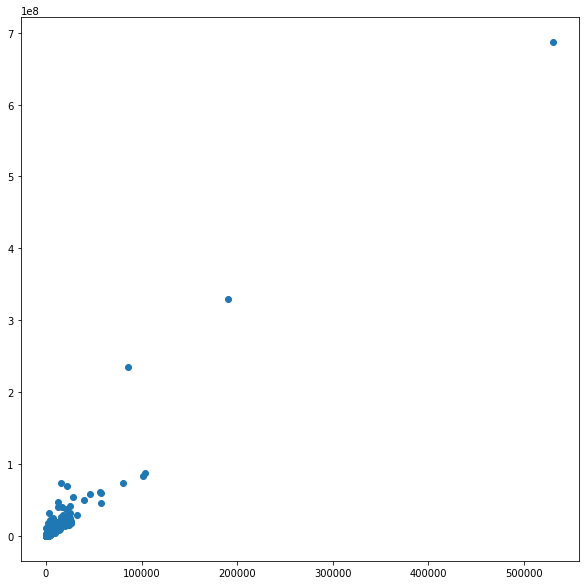

In [50]:
# Escolhi a coluna GDP (Produto interno bruto) e a coluna COM_TOT (número total de companhias) , prever GDP de uma cidade baseado no total de companhias
y = df_brazil.loc[:,'GDP'].values
x = df_brazil.loc[:, 'COMP_TOT'].values
plt.figure(figsize=(10,10))
plt.scatter(x,y)

In [51]:
corrL=df_brazil['GDP'].corr(df_brazil['COMP_TOT']) # Correlação entre as duas é alta, por isso escolhi elas duas
corrL

0.9701666725720989

<h1>Aumentar o número total de companhias de uma cidade aumenta proporcionalmente seu PIB?<h1>

In [52]:
# nova forma à matriz sem alterar seus dados.
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [53]:
#Dividir em teste e em treino
#75% pra treinamento e 25% para teste
x_tr, x_tes, y_tr, y_test = train_test_split(x, y, test_size=0.25) 
print(len(x_tr), len(x_tes))

4172 1391


In [54]:
#Aplicando as fórmulas estatísticas
Funcao_Regressao = LinearRegression()
Funcao_Regressao.fit(x_tr,y_tr) 


LinearRegression()

In [55]:
#modelo perto de 1, teve performance boa
Funcao_Regressao.score(x_tr, y_tr) 

0.9627344400565615

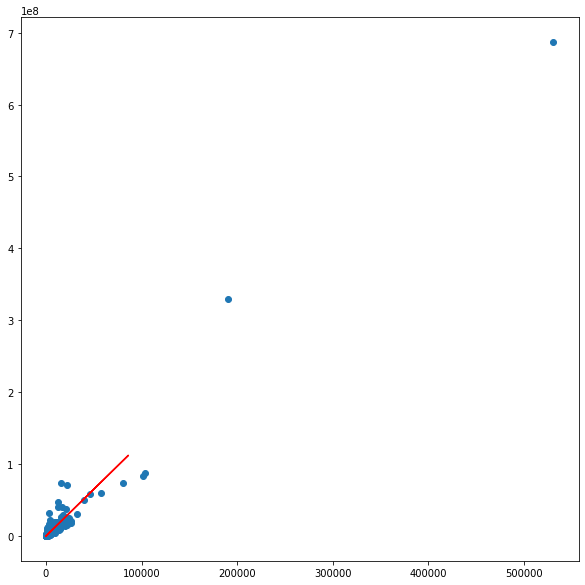

In [56]:
#Plotando a reta da regressão
plt.figure(figsize=(10,10))
plt.scatter(x_tr, y_tr) #Plotando os dois eixos
plt.plot(x_tes, Funcao_Regressao.predict(x_tes), color = 'red'); #Fazendo previções

In [57]:
# Avaliando o Erro médio
previsao = Funcao_Regressao.predict(x_tes)
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, previsao))) 

RMSE 3630198.087285354


<h3>Respodendo a pergunta, A resposta é não em alguns casos , a correlaçao entre  o PIB e o total de companhias é bastante forte, porém não significa que é completamente proporcional, analisando a reta vemos que há grande tendência de aumento de companhias junto com o PIB de cada cidade!<h3>

# **7 Random Forest Regressor**

In [58]:
y = df_brazil.loc[:,'GDP'].values
x = df_brazil.loc[:, 'COMP_TOT'].values.reshape(-1,1)

In [59]:
#Dividir em teste e em treino
#75% pra treinamento e 25% para teste
x_tr, x_tes, y_tr, y_tes = train_test_split(x, y, test_size=0.25) 
print(len(x_tr), len(x_tes))

4172 1391


In [60]:
#Criamos um random forest , podemos alterar número de árvores, aqui botei 1000 árvores
floresta = RandomForestRegressor(max_depth=8, n_estimators=25, random_state=0) 

# Treina o modelo
floresta.fit(x_tr,y_tr)

# Aplica o modelo treinado no dataset de teste para prever o resultado
y_pre = floresta.predict(x_tes)

In [61]:
#Aqui vemos a acurácia do modelo
metrics.r2_score(y_tes, y_pre)

0.4028220554253791

In [62]:
#Aqui o erro
np.sqrt(mean_squared_error(y_tes,y_pre))

16067568.144012121

# **8 K-Neighbors**


In [63]:
#Ainda usando GDP e COMP_TOT
y = df_brazil.loc[:,'GDP'].values.reshape(-1,1)
x = df_brazil.loc[:, 'COMP_TOT'].values

In [64]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25)


In [66]:
vizinhos_3 = KNeighborsRegressor(n_neighbors=3)
modelo = vizinhos_3.fit(x, y)

In [67]:
print('Score entre testes: ',vizinhos_3.score(x_test,y_test))

Score entre testes:  0.7837303752344612


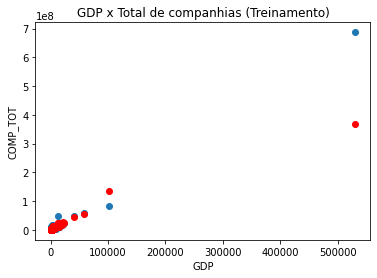

In [68]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, vizinhos_3.predict(x_test), color='red')
plt.title('GDP x Total de companhias (Treinamento)')
plt.xlabel('GDP')
plt.ylabel('COMP_TOT')
plt.show()

Até então temos que a Regressao Linear e o K-Neighbors-Regressor são os melhores nossos melhores algoritmos testados

In [69]:
from pyngrok import ngrok
# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = ""
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

MLflow Tracking UI: https://a7e6-34-123-1-157.ngrok.io


In [ ]:
!mlflow ui

[2022-10-04 00:46:21 +0000] [1433] [INFO] Starting gunicorn 20.1.0
[2022-10-04 00:46:21 +0000] [1433] [INFO] Listening at: http://127.0.0.1:5000 (1433)
[2022-10-04 00:46:21 +0000] [1433] [INFO] Using worker: sync
[2022-10-04 00:46:21 +0000] [1436] [INFO] Booting worker with pid: 1436


In [ ]:
mlflow.end_run()